ARIMA Modelling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/NVDA.csv')
# , index_col ='Date'

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-20,132.149994,134.830002,130.570007,131.759995,131.679443,52481800
1,2022-09-21,132.130005,140.309998,131.100006,132.610001,132.528931,80767900
2,2022-09-22,130.699997,131.490005,124.279999,125.610001,125.533211,75916200
3,2022-09-23,124.199997,126.110001,122.570000,125.160004,125.083488,66330900
4,2022-09-26,124.910004,126.589996,122.139999,122.279999,122.205246,54734300


<Axes: >

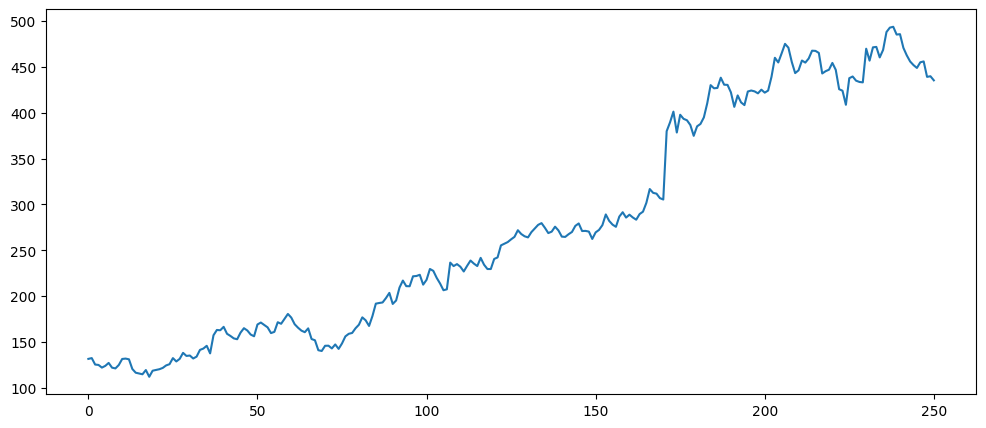

In [ ]:
df['Close'].plot()

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) # If your Date column is of the type object otherwise skip this
# date_range = str(df['Date'].dt.date.min()) + ' to ' +str(df['Date'].dt.date.max())
# print(date_range)

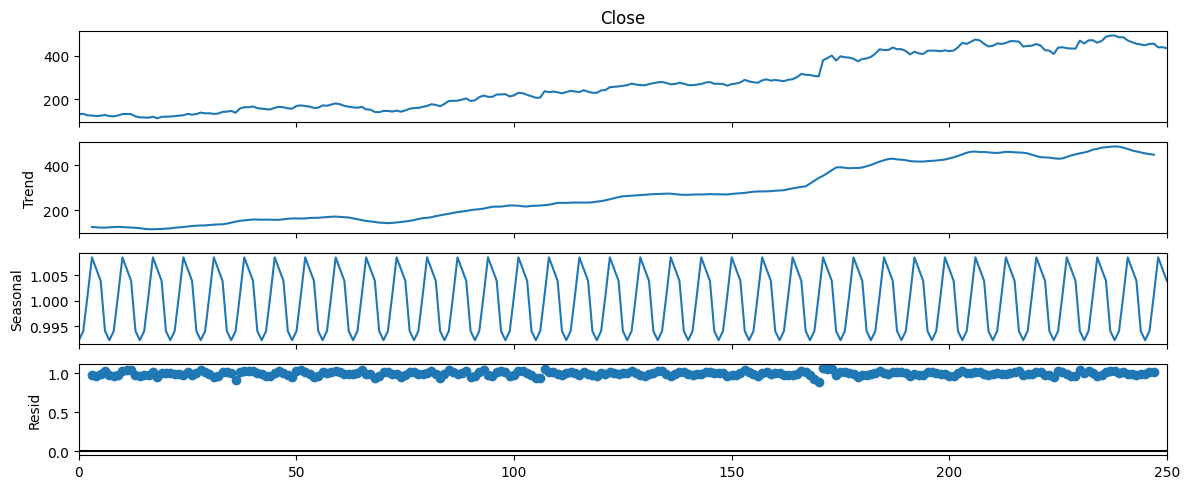

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result = seasonal_decompose(df['Close'],
                            model ='multiplicative',
                            period = 7)

# ETS plot
result.plot();


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARMA, ARIMA,ARMAResults,ARIMAResults

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: >

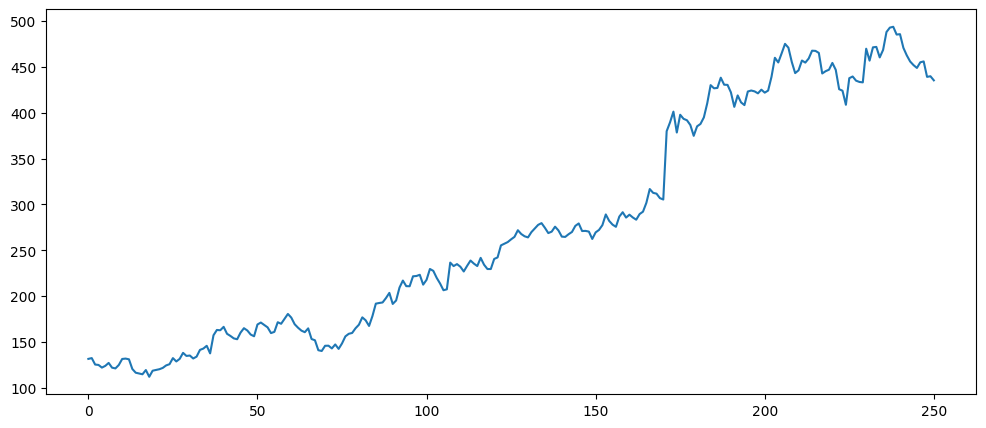

In [ ]:
df['Close'].plot()

In [ ]:
from scipy.integrate._ivp.radau import E
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
  result = adfuller(series.dropna(), autolag='AIC')
  labels = ['ADF Test statistic', 'p-value', '# lags used', '# observations']
  out = pd.Series(result[0:4],index=labels)
  for key,val in result[4].items():
    out[f'critical value ({key})']=val

  print(out.to_string)

  if result[1] <= 0.05:
    print("Sufficient evidence to prove data has no unit root and is stationary")
  else:
    print('Sufficient evidence to prove data has unit root and is not stationary')

In [ ]:
adf_test(df['Close']);

<bound method Series.to_string of ADF Test statistic       -0.471371
p-value                   0.897483
# lags used               0.000000
# observations          250.000000
critical value (1%)      -3.456781
critical value (5%)      -2.873172
critical value (10%)     -2.572969
dtype: float64>
Sufficient evidence to prove data has unit root and is not stationary


In [ ]:
from statsmodels.tsa.statespace.tools import diff

In [ ]:
# df['Close'] = diff(df['Date'],k_diff=1)

In [ ]:
result = auto_arima(df['Close'],seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1836.090, Time=2.72 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1829.061, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1832.769, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1832.764, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1831.274, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1830.769, Time=0.35 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1830.764, Time=0.48 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1831.058, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1831.058, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=1.58 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7] intercept
Total fit time: 7.262 seconds


In [ ]:
len(df)

251

In [ ]:
train = df.iloc[:200]
test = df.iloc[200:]

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import statsmodels.api as sm


In [ ]:
# model = SARIMAX(train['Close'], order=(0,1,0))
# # model = sm.tsa.arima.ARIMA(train['Close'], order=(4,4,4))
# result = model.fit()
# type(result)

In [ ]:
# result.summary()

In [ ]:
def to_int(datetime):
  return datetime.year*10000000000 + datetime.month * 100000000 + datetime.day * 1000000

def to_string(datetime):
  return f'{datetime.year}-{datetime.month}-{datetime.day}'

def to_datetime(date):
   op = datetime.datetime(year = date.year, month = date.month, day = date.day)
   return op




In [ ]:
start = len(train)
end = len(train) + len(test) - 1
date_start = df.index[start]
date_end = df.index[end]


In [ ]:
predictions = result.predict(start= date_start, end=date_end).rename('ARIMA Predictions')


In [ ]:
predictions

251    436.413772
252    437.627532
253    438.841292
254    440.055052
255    441.268812
256    442.482572
257    443.696332
258    444.910093
259    446.123853
260    447.337613
Name: SARIMAX (0,1,0) Predictions, dtype: float64

In [ ]:
import datetime

<Axes: >

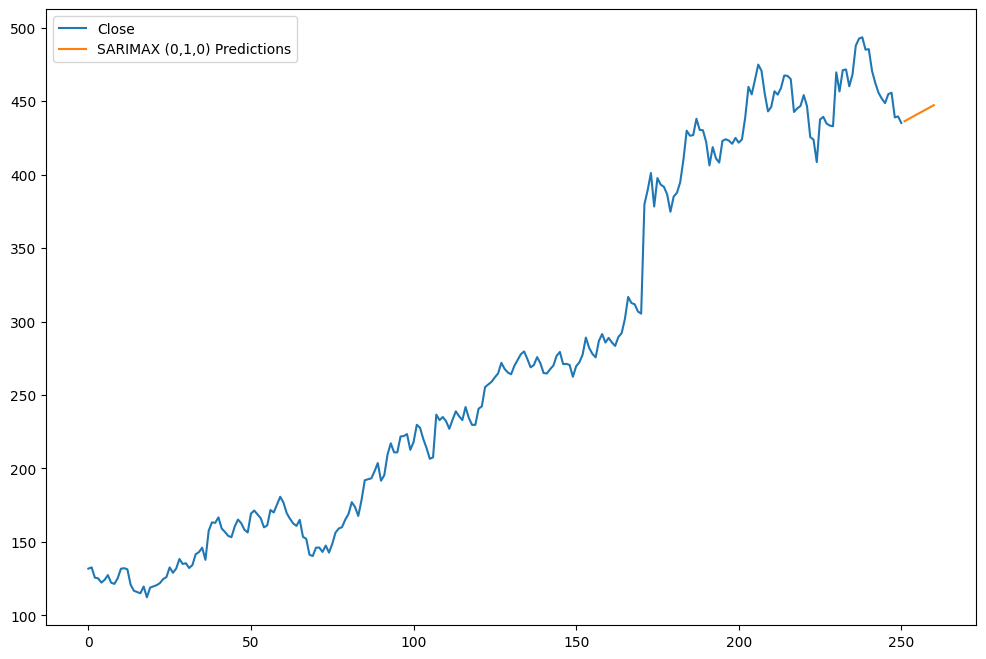

In [ ]:
 #  2022-09-20 to 2023-09-19

fig, ax = plt.subplots()
# ax.set_xlim([datetime.date(2022, 8, 15), datetime.date(2023, 9, 19)])
# ax.set_ylim([0, 700])
df['Close'].plot(figsize=(12,8),legend=True)
predictions.plot(figsize=(12,8),legend=True)




In [ ]:
!pip install statsmodels

In [ ]:
# The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model.
# Auto-ARIMA works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron)
# to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges.
#  If the seasonal optional is enabled, auto-ARIMA also seeks to identify the optimal P and Q hyper- parameters
#   after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

# In order to find the best model, auto-ARIMA optimizes for a given information_criterion,
#  one of (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’) (Akaike Information Criterion,
# Corrected Akaike Information Criterion, Bayesian Information Criterion,
# Hannan-Quinn Information Criterion, or “out of bag”–for validation scoring–respectively) and returns the ARIMA which minimizes the value.


result2 = auto_arima(df['Close'],seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1836.090, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1829.061, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1832.769, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1832.764, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1831.274, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1830.769, Time=0.49 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=1830.764, Time=0.37 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1831.058, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1831.058, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=1.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7] intercept
Total fit time: 6.924 seconds


In [ ]:
predictions2 = result2.predict(50, 0, typ = 'levels').rename('SARIMAX (0,1,0) Predictions')

In [ ]:
predictions2

251    436.413772
252    437.627532
253    438.841292
254    440.055052
255    441.268812
256    442.482572
257    443.696332
258    444.910093
259    446.123853
260    447.337613
261    448.551373
262    449.765133
263    450.978893
264    452.192653
265    453.406413
266    454.620173
267    455.833933
268    457.047693
269    458.261453
270    459.475213
271    460.688973
272    461.902733
273    463.116494
274    464.330254
275    465.544014
276    466.757774
277    467.971534
278    469.185294
279    470.399054
280    471.612814
281    472.826574
282    474.040334
283    475.254094
284    476.467854
285    477.681614
286    478.895374
287    480.109135
288    481.322895
289    482.536655
290    483.750415
291    484.964175
292    486.177935
293    487.391695
294    488.605455
295    489.819215
296    491.032975
297    492.246735
298    493.460495
299    494.674255
300    495.888015
Name: SARIMAX (0,1,0) Predictions, dtype: float64

<Axes: >

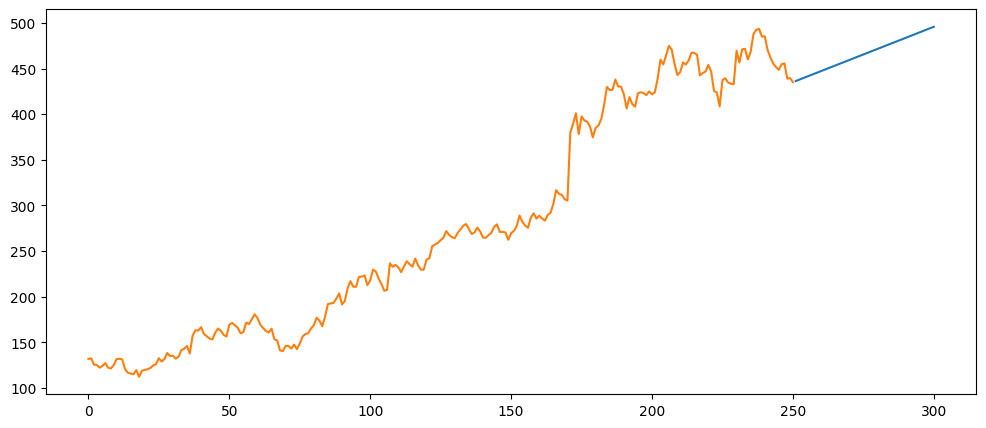

In [ ]:
predictions2.plot()
df['Close'].plot()


Neural Networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/NVDA.csv', parse_dates= True, index_col ='Date')
df = df[['Close']]
df.head()


,Close
Date,
2022-09-20,131.759995
2022-09-21,132.610001
2022-09-22,125.610001
2022-09-23,125.160004
2022-09-26,122.279999


<Axes: xlabel='Date'>

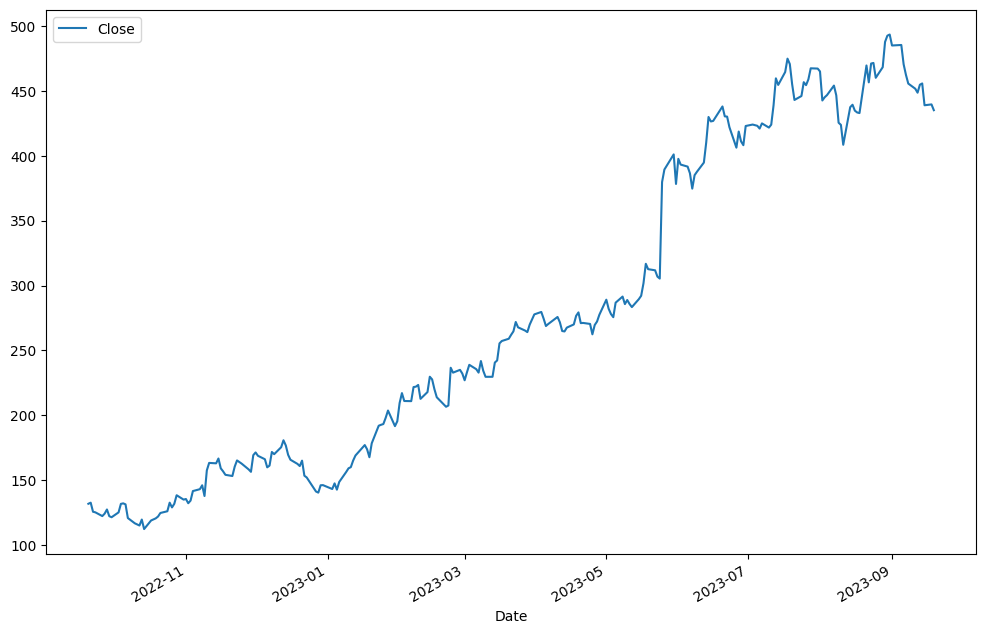

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
train = df.iloc[:190]
test = df.iloc[190:]
train

,Close
Date,
2022-09-20,131.759995
2022-09-21,132.610001
2022-09-22,125.610001
2022-09-23,125.160004
2022-09-26,122.279999
...,...
2023-06-15,426.529999
2023-06-16,426.920013
2023-06-20,438.079987


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
lens = len(scaled_test) - 1
print(lens)
generator = TimeseriesGenerator(scaled_train,scaled_train, length=lens, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=lens, batch_size=1)

60


In [ ]:
X,y = generator[0]
len(X[0])

60

In [ ]:
 from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout


In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape=(60, n_features)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

model.add(Dense(1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
 batch_normalization (Batch  (None, 1)                 4         
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                        

In [ ]:
model.fit_generator(generator, epochs = 200, validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/200


<ipython-input-22-d30a3cd7d8cd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 200, validation_data=validation_generator,callbacks=[early_stop])


130/130 [==============================] - 30s 165ms/step - loss: 0.2104 - val_loss: 0.8089
Epoch 2/200
130/130 [==============================] - 14s 106ms/step - loss: 0.1469 - val_loss: 0.6672
Epoch 3/200
130/130 [==============================] - 9s 67ms/step - loss: 0.1205 - val_loss: 0.5773
Epoch 4/200
130/130 [==============================] - 8s 60ms/step - loss: 0.0984 - val_loss: 0.5096
Epoch 5/200
130/130 [==============================] - 9s 70ms/step - loss: 0.0898 - val_loss: 0.4685
Epoch 6/200
130/130 [==============================] - 9s 71ms/step - loss: 0.0962 - val_loss: 0.4403
Epoch 7/200
130/130 [==============================] - 9s 69ms/step - loss: 0.0901 - val_loss: 0.4222
Epoch 8/200
130/130 [==============================] - 8s 63ms/step - loss: 0.1014 - val_loss: 0.4058
Epoch 9/200
130/130 [==============================] - 9s 72ms/step - loss: 0.0886 - val_loss: 0.4023
Epoch 10/200
130/130 [==============================] - 9s 70ms/step - loss: 0.0989 - val_

In [ ]:
print(len)

<built-in function len>


In [ ]:
def predict_range(lens, input, model, n_features):

  predictions = []
  first_batch = input[-lens:]
  # print(first_batch)
  current_batch = first_batch.reshape((1, lens, n_features))
  # print(current_batch)
  # print(test)
  # print(len(test))

  for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    # print(current_pred)
    predictions.append(current_pred)
    # print('hrllo')

    current_batch = np.append(current_batch[:,1:,:], [current_pred], axis=1)
    # print('hrlle')
  return predictions

In [ ]:
predictions_list = predict_range(60, scaled_train, model, 1)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(predictions_list)

[[0.28816247]]


In [ ]:
true_predictions = scaler.inverse_transform(predictions_list)
test['Predictions'] = true_predictions
# print(true_predictions)
test

ValueError: ignored

In [ ]:
test.plot(figsize=(12,8))

New Attempt

In [383]:
df = pd.read_csv('/content/NVDA.csv')
inp_dates = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date']).values.astype("int64")


In [384]:
inp_dates

0     2022-09-20
1     2022-09-21
2     2022-09-22
3     2022-09-23
4     2022-09-26
         ...    
246   2023-09-13
247   2023-09-14
248   2023-09-15
249   2023-09-18
250   2023-09-19
Name: Date, Length: 251, dtype: datetime64[ns]

In [385]:
dataset = df.filter(['Close']).values

In [386]:
training_count = 190

In [387]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# print(scaled_data)
train_data = scaled_data[0:training_count, :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [388]:
# LSTMs maintain a memory of past information, allowing them to capture long-term dependencies in the data.
#  This is essential for understanding how past data points affect future predictions in time series forecasting.
# It also uses two LSTM layers stacked on top of each other.
#  Stacking LSTMs can help the network learn complex hierarchical patterns in the data.
#   The first LSTM layer can capture lower-level temporal patterns, and the second layer can capture higher-level patterns,
#    potentially improving the model's ability to make accurate predictions.
# The use of a dense layer with 32 units can add non-linearity and capture complex relationships in the data.
# The dropout layer with a dropout rate of 0.5 can help prevent overfitting.
#  Overfitting occurs when the model learns the training data too well, making it perform poorly on new, unseen data.
#   Dropout can help improve the model's generalization.
model = Sequential()
model.add(LSTM(units=64,return_sequences=True, input_shape=(x_train.shape[1], 1)))

model.add(LSTM(units=64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x783932e83550>>

In [389]:

model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
5/5 [==============================] - 5s 58ms/step - loss: 0.0980
Epoch 2/10
5/5 [==============================] - 0s 64ms/step - loss: 0.0322
Epoch 3/10
5/5 [==============================] - 0s 58ms/step - loss: 0.0200
Epoch 4/10
5/5 [==============================] - 0s 61ms/step - loss: 0.0207
Epoch 5/10
5/5 [==============================] - 0s 59ms/step - loss: 0.0140
Epoch 6/10
5/5 [==============================] - 0s 60ms/step - loss: 0.0165
Epoch 7/10
5/5 [==============================] - 0s 59ms/step - loss: 0.0202
Epoch 8/10
5/5 [==============================] - 0s 58ms/step - loss: 0.0132
Epoch 9/10
5/5 [==============================] - 0s 61ms/step - loss: 0.0123
Epoch 10/10
5/5 [==============================] - 0s 57ms/step - loss: 0.0136


In [390]:
test_data = scaled_data[training_count - 60:, :]
x_test = []
print(len(dataset))
print(len(test_data))
y_test = dataset[training_count:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

251
121
2/2 [==============================] - 1s 20ms/step
MSE 451.46883249411457
RMSE 21.247795944382432


<ipython-input-391-9b7c88c4486f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions
<ipython-input-391-9b7c88c4486f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = inp_dates[:training_count]
<ipython-input-391-9b7c88c4486f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

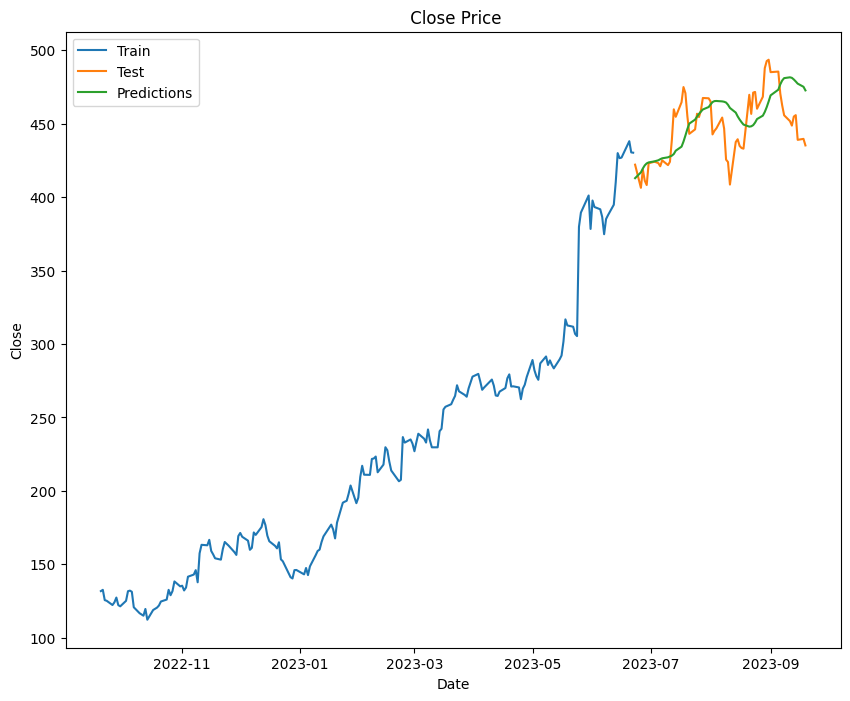

In [391]:
train = df[:training_count]
test = df[training_count:]
test['Predictions'] = predictions

train['Date'] = inp_dates[:training_count]
train =train.set_index('Date')

test['Date'] = inp_dates[training_count:]
test =test.set_index('Date')

plt.figure(figsize=(10, 8))
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.title(' Close Price')
plt.xlabel('Date')
plt.ylabel("Close")

plt.legend(['Train', 'Test', 'Predictions'])


In [392]:
from datetime import datetime

In [393]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# print(scaled_data)
train_data = scaled_data
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [394]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [395]:
model = Sequential()
model.add(LSTM(units=64,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x78393298abc0>>

In [396]:

model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=30)

Epoch 1/30
6/6 [==============================] - 6s 62ms/step - loss: 0.2627
Epoch 2/30
6/6 [==============================] - 0s 65ms/step - loss: 0.0774
Epoch 3/30
6/6 [==============================] - 0s 64ms/step - loss: 0.0327
Epoch 4/30
6/6 [==============================] - 0s 62ms/step - loss: 0.0399
Epoch 5/30
6/6 [==============================] - 0s 64ms/step - loss: 0.0235
Epoch 6/30
6/6 [==============================] - 0s 63ms/step - loss: 0.0325
Epoch 7/30
6/6 [==============================] - 0s 71ms/step - loss: 0.0225
Epoch 8/30
6/6 [==============================] - 0s 61ms/step - loss: 0.0206
Epoch 9/30
6/6 [==============================] - 0s 63ms/step - loss: 0.0209
Epoch 10/30
6/6 [==============================] - 0s 65ms/step - loss: 0.0198
Epoch 11/30
6/6 [==============================] - 0s 62ms/step - loss: 0.0208
Epoch 12/30
6/6 [==============================] - 0s 61ms/step - loss: 0.0208
Epoch 13/30
6/6 [==============================] - 0s 64ms/st

In [397]:
# op_dates = ['25/10/2023','7/11/23']
# op_date_range = pd.to_datetime(op_dates, errors = 'coerce')

start_date = datetime(2023, 9, 20)
end_date = datetime(2023, 11, 7)
df['Date'] = pd.to_datetime(df['Date']).values.astype("float64")

dates = pd.date_range(start=start_date, end=end_date, freq='1D')#.values.astype("int64").tolist()

In [398]:
real_test = []
for i in range(60, len(test_data)):
    real_test.append(test_data[i-60:i, 0])

real_test = np.array(real_test)
real_test = np.reshape(real_test, (real_test.shape[0], real_test.shape[1], 1))


In [399]:
real_predictions = model.predict(real_test)
real_predictions = scaler.inverse_transform(real_predictions)
real_predictions = pd.DataFrame(real_predictions,columns=['Close'])

2/2 [==============================] - 1s 20ms/step


In [400]:
real_x_test = pd.DataFrame(dates,columns=['Date'])
real_x_test

,Date
0,2023-09-20
1,2023-09-21
2,2023-09-22
3,2023-09-23
4,2023-09-24
5,2023-09-25
6,2023-09-26
7,2023-09-27
8,2023-09-28
9,2023-09-29


In [401]:
train = df
train['Date'] = inp_dates
train =train.set_index('Date')
train =train.drop(columns=['Open', 'High','Low','Adj Close', 'Volume'])
train

,Close
Date,
2022-09-20,131.759995
2022-09-21,132.610001
2022-09-22,125.610001
2022-09-23,125.160004
2022-09-26,122.279999
...,...
2023-09-13,454.850006
2023-09-14,455.809998
2023-09-15,439.000000


In [402]:
test = pd.concat([real_x_test, real_predictions], axis=1)
test = test.dropna()
test = test.set_index('Date')
test

,Close
Date,
2023-09-20,401.034668
2023-09-21,403.907013
2023-09-22,405.362579
2023-09-23,406.481567
2023-09-24,406.927429
2023-09-25,406.814636
2023-09-26,407.051575
2023-09-27,407.494537
2023-09-28,407.999756


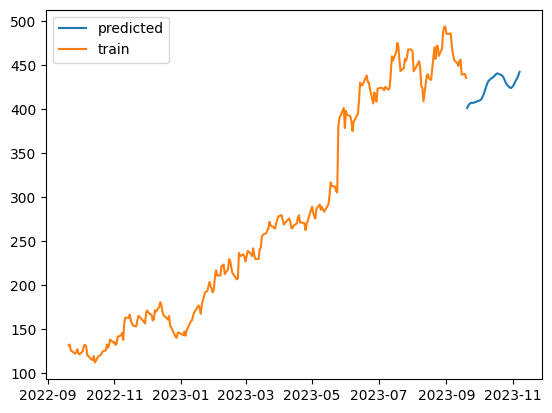

In [403]:
plt.plot(test)
plt.plot(train)
plt.legend(['predicted','train'])


In [405]:
# test['Close'].loc['2023-10-25':'2023-11-07']
test.loc['2023-10-25':'2023-11-07']

,Close
Date,
2023-10-25,430.671722
2023-10-26,428.396515
2023-10-27,426.811829
2023-10-28,425.532227
2023-10-29,424.467743
2023-10-30,423.580688
2023-10-31,424.547852
2023-11-01,425.895294
2023-11-02,428.140442
